In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_dreamz_5chain_a_psostart.p'))
trace_b = pickle.load(open('earm_dreamz_5chain_b_psostart.p'))
trace_c = pickle.load(open('earm_dreamz_5chain_c_psostart.p'))
trace_d = pickle.load(open('earm_dreamz_5chain_d_psostart.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [6]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [7]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [8]:
from earm_uniform_emcee import log_post

In [9]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -906.644230958  post:  -1189.12364216
prior:  -282.479411206  like:  -913.539964014  post:  -1196.01937522
prior:  -282.479411206  like:  -923.778871732  post:  -1206.25828294
prior:  -282.479411206  like:  -918.056293693  post:  -1200.5357049
prior:  -282.479411206  like:  -914.875594407  post:  -1197.35500561
prior:  -282.479411206  like:  -825.520381064  post:  -1107.99979227
prior:  -282.479411206  like:  -791.724493091  post:  -1074.2039043
prior:  -282.479411206  like:  -803.368674621  post:  -1085.84808583
prior:  -282.479411206  like:  -849.443855353  post:  -1131.92326656
prior:  -282.479411206  like:  -835.877727157  post:  -1118.35713836
prior:  -282.479411206  like:  -953.242662899  post:  -1235.72207411
prior:  -282.479411206  like:  -939.198807162  post:  -1221.67821837
prior:  -282.479411206  like:  -948.887988005  post:  -1231.36739921
prior:  -282.479411206  like:  -933.964391522  post:  -1216.44380273
prior:  -282.479411206  like:  -956.

In [10]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  99  of  105  parameters.
Percent of parameters with GR below 1.2:  94.2857142857
Number of parameters with GR below 1.1:  86  of  105  parameters.
Percent of parameters with GR below 1.1:  81.9047619048


[99, 94.28571428571428, 86, 81.9047619047619]

In [11]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  104  of  105  parameters.
Percent of parameters with GR below 1.1:  99.0476190476


[105, 100.0, 104, 99.04761904761905]

In [12]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [13]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

60000
5
60000


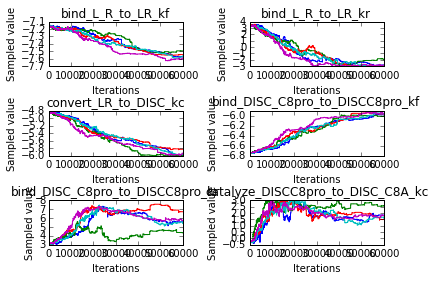

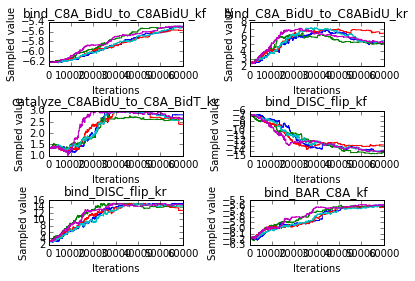

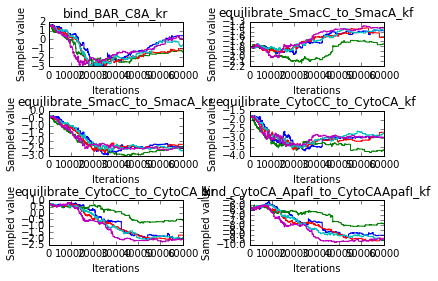

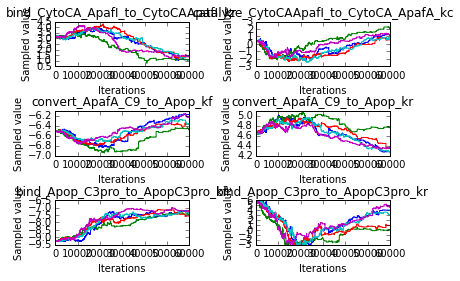

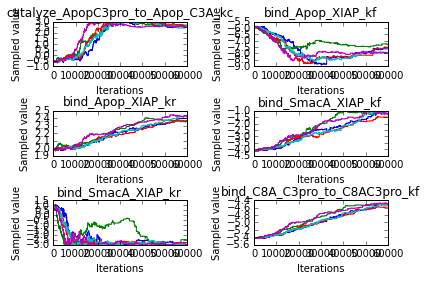

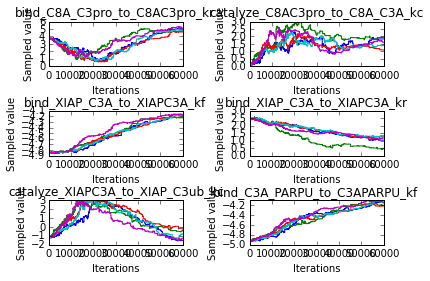

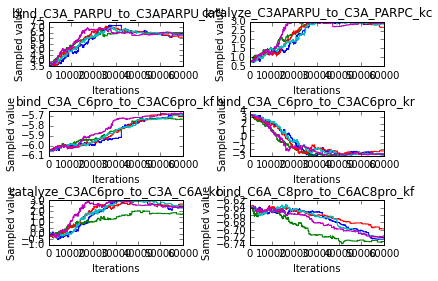

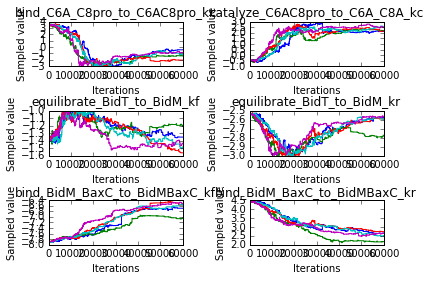

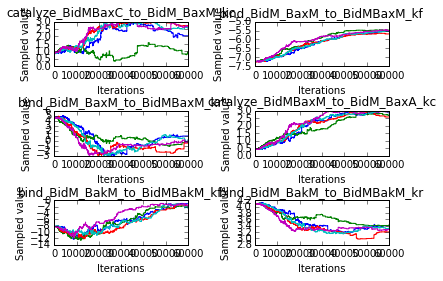

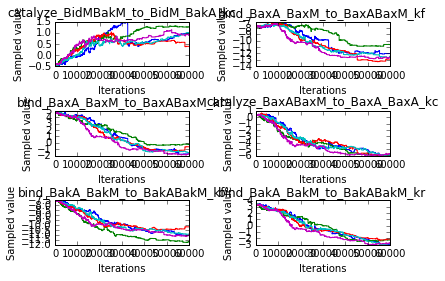

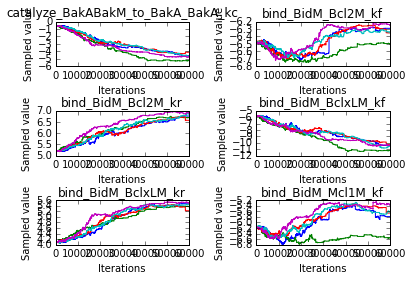

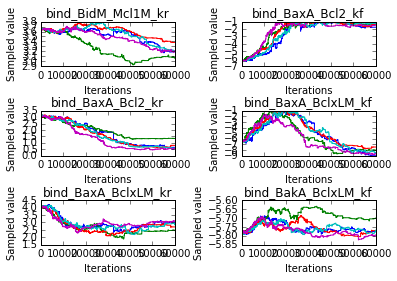

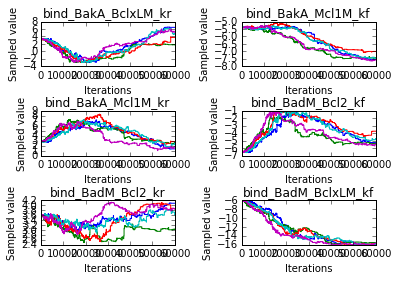

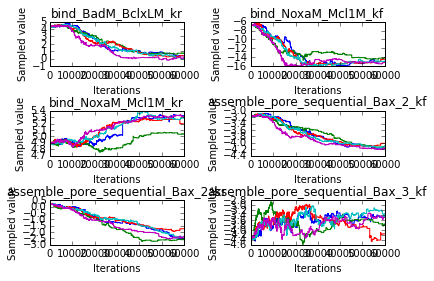

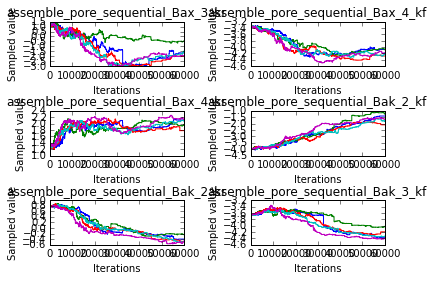

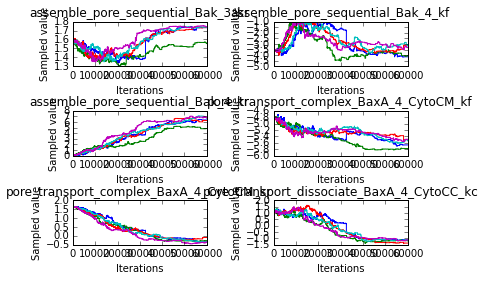

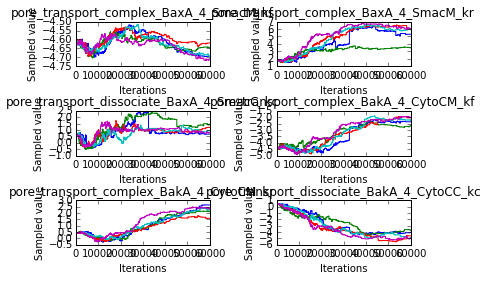

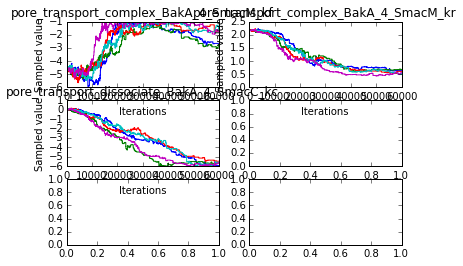

In [14]:
sample_plots(param_trace_a)

In [15]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

In [16]:
np.save('earm_dreamz_5chain_psostart_a_tracearr.npy', trace_arr_a)
np.save('earm_dreamz_5chain_psostart_b_tracearr.npy', trace_arr_b)
np.save('earm_dreamz_5chain_psostart_c_tracearr.npy', trace_arr_c)
np.save('earm_dreamz_5chain_psostart_d_tracearr.npy', trace_arr_d)

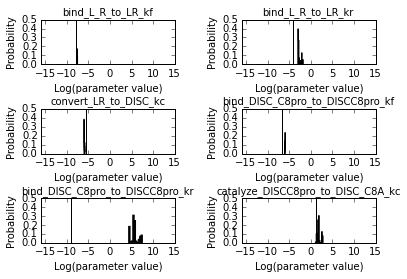

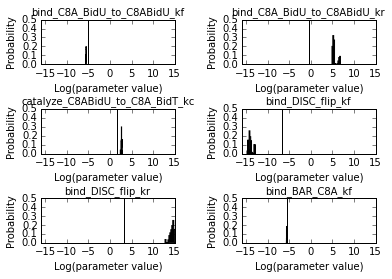

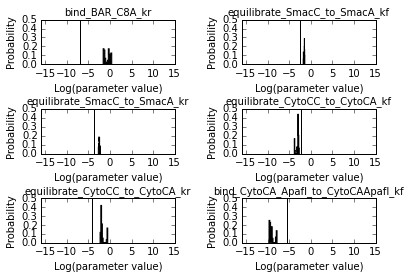

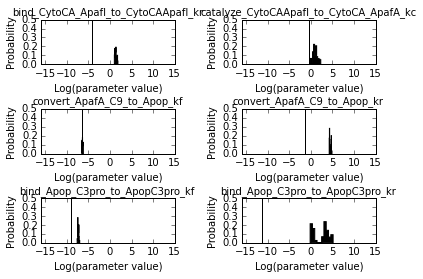

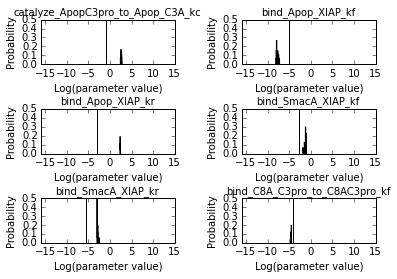

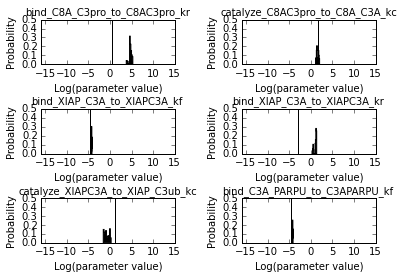

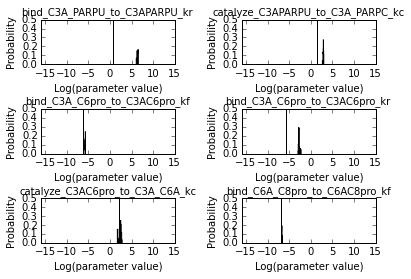

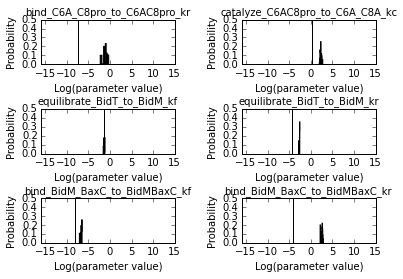

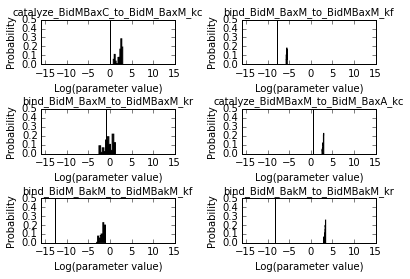

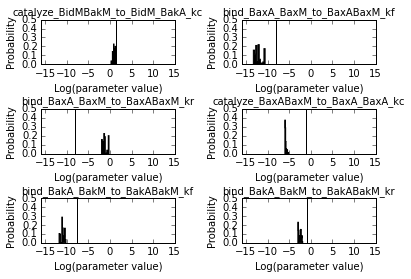

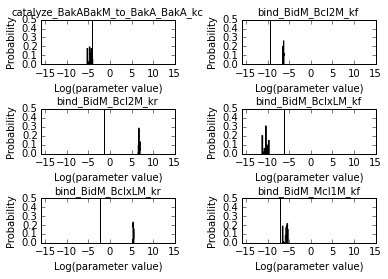

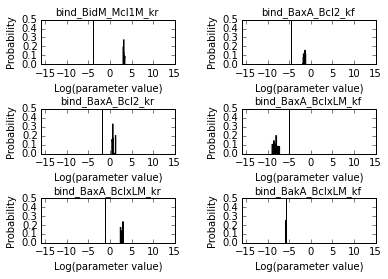

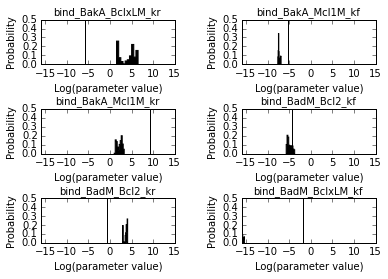

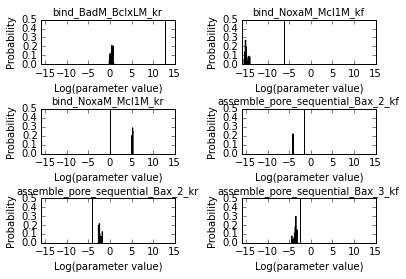

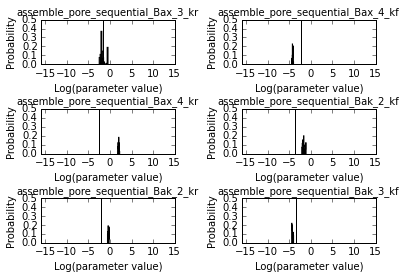

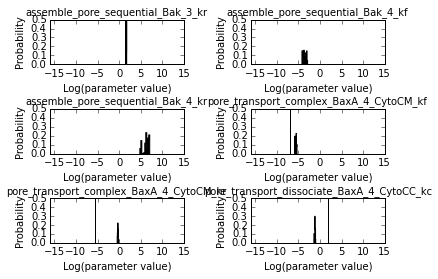

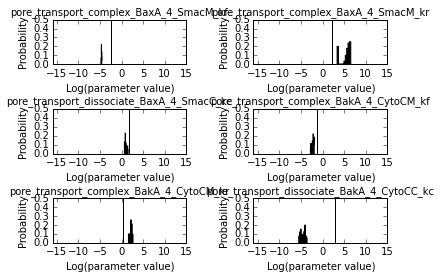

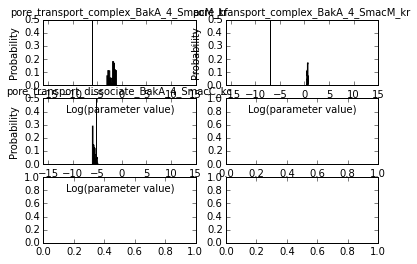

In [17]:
plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10)